# Abstract

This project aims to ultilise a SpikerBox to record EOG signals and then use a classifier to classify different types of eye movements which can then be to control a Spotify application. The project aims to enable individuals with limited mobility to interact with the Spotify app hands-free, thereby enhancing their music listening experience.
The key findings from this project show how we can effectively use eye moments as a form of input modality. After careful evaluation and testing of the different classifiers and filtration methods our team came to conclusion to use a frequency filter of 3-15 Hz and a random forest model trained on a comprehensive set of features extracted from the tsfeatures package, using a threshold value for standard deviation to detect events. This framework obtained an accuracy of 94.86% with 5 fold cross validation and a round trip latency of approximately 7.78 ms.

# Introduction

The development of technologies to interact with digital systems using different human signals has seen increasing progress in recent years. In this project, a multidisciplinary team of physics and data science students collaborated to develop a method to control music playback using eye signals, facilitated by the brain SpikerBox. The motivation behind the project was to provide a convenient and accessible way for people with mobility disabilities and physical impairments to control music playback without the need for traditional input devices. Music has always been a universal form of entertainment and expression, as well as a source of comfort and for people with physical disabilities it can be a challenge to control the user interface especially with limited mobility and when confined to a hospital bed or housebound.

The human eye exhibits bioelectromagnetic characteristics resulting in an electric potential between the cornea and retina which forms an electric dipole. Movement in the eye's orientation can induce a measurable change in the electric field producing an electrooculogram(EOG) signal. Through the use of electrodes, this signal can be read by the brain SpikerBox which will produce a waveform of the EOG signal. The EOG signal provides insights into eye-related phenomena and the dynamics and functionality of the eye, allowing for different actions such as looking left or right to be differentiated.


### Workflow Diagram

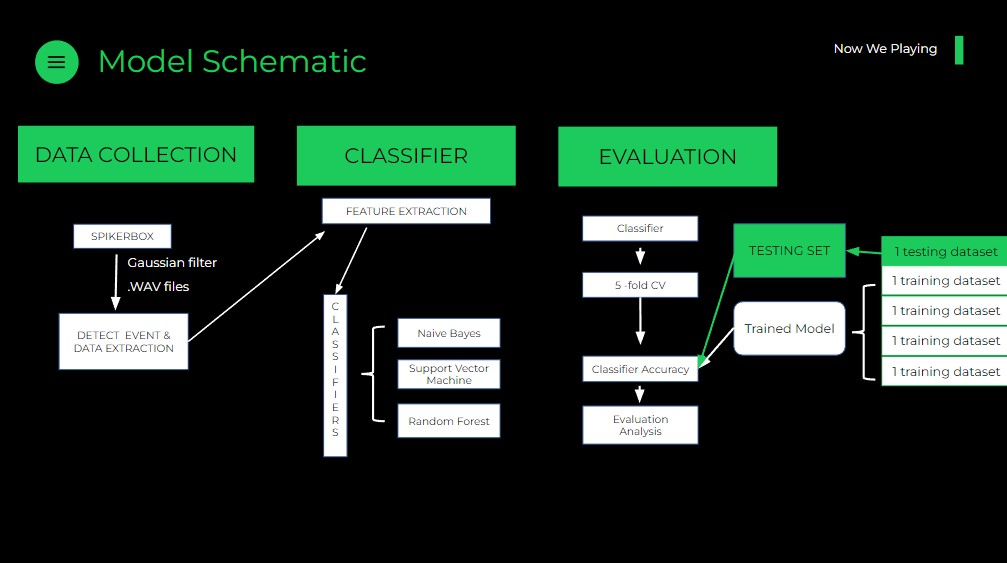

# Methods

## 2.1 DATA COLLECTION

Data collection for the classifier training was performed by creating .wav files which could then be put through the training code to extract features of known values. Using the spikerstream software, it was possible to record events and time stamp relative movements which could then be annotated as ‘Left’ or ‘Right’ eye movements. In total, approximately thirty files were created, each with a range of eye movements and number of signals from anywhere between three and fifteen signals. By using the spiker box in the same configuration as it would be in the final product, this ensured continuity and minimal confusion of the classifier. Minimising sources of noise was also taken into account by not having any mains power connected to the computer or around the spiker box as this would cause electromagnetic interference and create a noisy signal. 



## 2.2 DATA PREPROCESSING

### Dataset
Our training dataset contains multiple folders, each holding a .wav file and a text file. The .wav file comprises multiple events from 3 to 15 events per wave file in order to get a variety of states of the eye. The text file has start timings of the event along with the movement(Left or Right),which enables us to find the event in the wav file and poplutate the labels. We extract the values of the wav file till 750 ms after the start time this creates our dataset contains the labels for each corresponding event. Now we can pass this dataset on further for feature extraction.



### Identify
To identify events, we tested multiple approaches; using standard deviation (SD), number of median crossing and gradient in the interval. Of the three, the gradient gave us the most unreliable results, routinely misclassifying events. Both SD and median crossing methods work by calculating their respective values in the current window (of length 500 ms) and checking whether they cross a certain threshold value. Both methods were comparative in terms of accuracy, correctly returning the start of the event at every window. However, there was a slight difference in latency. After testing both methods on the live model, we found that, on average of 20 trials, the SD method took 7.7724 ms at each interval and 7.8707 ms for the median crossing. Doing a two sample t test on these values, we found that there was evidence of a statistical difference between these two methods (p value = 0.103). Therefore, we went with the standard deviation method.

Our final model marks the time when the SD for an interval crosses 35, which we found was the optimal value after checking all threshold values from 10 to 50 and observing the value of SD when we had an event.Then we note down all ‘Y’ values till the SD falls below 35, this sequence is then passed onto our Random forest classifier for feature extraction and subsequent prediction.


### Downsampling
In order to mediate the challenges that brought from a large length of wave sequence, we implemented down sampling to reduce the sample rate. The process of down sampling releases the management burden in the dataset and calculation burden in feature extraction. In this down sampling, we selected one data point out of every 350 wave values as a new sample rate.
 


### Feature extraction
We conducted feature extraction to transform wave sequence into numerical features for each eye movement. Instead of straightforward import wave sequence, fit numerical features in classifier would help the classifier recognize the pattern underlying the wave sequence and make a more accurate prediction. There are 239 features that have been maintained after excluding all features including null values. The result of our feature extraction would provide more informative data for the classifier.
 


### Normalisation
Since computed features are measured in varying scales, the effect of the attributes would differ by their scale size. Compared with features measured in smaller scales, features with the larger scales would be much more significant to the classifier. And then resulted in an inaccurate classification by our classifier. Hence, we performed normalisation along each feature to ensure each feature equally contributes to our classifiers.


## 2.3 CLASSIFIERS


### 2.3.2 Feature selection
The process of feature selection has guaranteed a more efficient modelling process later. The dataset contains up to 239 numerical features, resulting in a high-dimension dataset that sharpens the accuracy of the classifier. Meanwhile, these large amounts of features could lead to overfitting in our classifier. Hence, we performed two types of feature selection strategy to filter relatively informative features to fit in our classifiers.

Firstly, we use variance as a measure to eliminate features that contain similar or single values in all observations in the dataset. Since these features offer less valuable information to generate a classifier with high accuracy and we have features, we can safely remove features. Secondly, we only retain the top 10 features that contribute most to our target label. By selecting limited features, the training time of the model and the dimensionality of the dataset have been effectively reduced with sacrificing minor predictive powers.


### 2.3.3 Classifier

When we completed feature extraction, in order to demonstrate our innovative thinking in encoding and processing large-scale data, we decided to use three different machine learning models to construct our classifier. Due to the large amount of data we collected coming from waveform files and our desire to reduce noise to recognize eye movements. Therefore, support vector machines and Random Forest that can handle many features and complex noise data are included in our model construction scope. At the same time，in order to ensure the efficiency and accuracy of our stable classification of eye movement directions, Naive Bayes became our last model to choose. Naive Bayes' inherent efficient training and prediction speed, as well as its simple algorithm principles, are also very suitable for our research motivation.




## 2.4 EVALUATION

### 2.4.1 SPIKERBOX

### Electronic position
In order to ensure the classifier had the best opportunity to work accurately and effectively, it required clean signals from the SpikerBox. From a physics perspective, there were different ways to clean up the signal without the need for any coding or software influence. Electrode placement was one area where it was very important to have the right positioning in order to isolate the eye movements that were the target of the analysis. Different configurations of electrode placement were tested by evaluating the size and clarity of the signal relative to the background noise, with different configurations either being noisy or not showing the desired eye movement.   This signal could then be passed through a filter in order to further clarify it for the classifier. 


### Noise
Once the signal was isolated, it could be cleaned up further using a frequency filter to remove any noise. It was noticed that when higher frequencies were allowed to be used in the signal, the noise level was quite high. By limiting the frequency at which the sample is measured to lower frequencies, the noise of the signal became much lower and was easier for the classifier to detect. A range of frequencies were analysed to identify the frequency range with the lowest amount of noise relative to the signal. Using both methods of signal clarification meant that the data provided was as clean as possible and allowed for more accurate signal extraction and classification. 


### 2.4.2 Classifier Evalutation 

We implement 10 fold cross validation with 50 repeats on three classifiers - Support Vector Machine, Random Forest, and Gaussian Naive Bayes to evaluate. Their performance on the classification task is notable as all of their accuracies are above 85%. Among three classifiers,  Random Forest performed the highest average accuracy of 93.5% that demonstrated its significant effectiveness in this classification task. While random forest reduces the risk of being overfit, it also has an advantage on noisy data because it is robust. Naive Bayes followed closely with an average accuracy of 86.2%, and can trained and evaluated relatively faster than other classifiers. We observed the lowest accuracy in Support Vector Machine that is 85.3%, although its ability to handle complex decision boundaries could help us generalise well on new samples from wave sequences and it might perform better when multiple people start using our product

### Hypothesis test 
In evaluation of classifer, our group choose three  machine learning methods, ANOVA test is appropriate for comparing the means of multiple groups simultaneously,so making it suitable for analyzing the performance differences among multiple classifiers.Based on the ANOVA test results, with an F-statistic of 202.809 and a p-value of 8.25e-115, The low p-value indicates  against the null hypothesis since p-value is smaller than 0.05, suggesting that at least one of the classifiers performs significantly better than the others. According to the accuracy, we choose the mean of random forest and mean of naive bayes to do t test, the t-test results show a significant difference between the naive bayes and random forest classifiers, with a t-statistic of -12.77 and small p-value of 1.63e-32. This indicates a highly significant difference in their performance


### AUC - ROC
 In terms of discrimination ability, the naive bayes classifier achieved an AUC-ROC score of 0.9736, while the random forest classifier achieved a perfect score of 1.0. These scores indicate their strong ability to distinguish between classes.Overall, both classifiers demonstrated excellent performance in classifier, with the random forest classifier showing a slightly better AUC-ROC score. Random forest machine learning method shows  the highest accuracy  to support our hypothesis. So we can conclude that there is a significant difference in the performance of the classifiers.


### User experience
To evaluate the user experience, usability and convenience of the product to control music playback will be considered. The device is fairly easy to set up, however would prove inconvenient for the products intended target audience who would need assistance to place the electrodes. Some might also consider the wearing of electrodes to be uncomfortable and invasive. Another limitation is the length of the connecting wires, which would limit how far an individual is able to move from the brain SpikerBox.  


## Results

Based on the average accuracy of the three models, combined with the evaluation of box plot and the test results of hypothesis test, Gaussian Naive Bayes has the relatively worst performance among three different classifiers, which may be due to its lack of high accuracy compared to the other two classifiers and its inherent algorithm assuming that all features are independent of each other. Although the average precision of support vector machine and random forest is very close, the expensive time and heavy memory consumption of Support vector machine for computing large-scale training data also make it lag behind random forest in performance. Random forest is undoubtedly the best of the four classifiers. When people import larger data sets, random forest training and prediction speed is relatively fast, showing the high efficiency that Support vector Machines do not possess. Therefore, we finally choose to use randomforest.

From the experimental evaluation of the electrode placement, the configuration of one just below each temple was used as it resulted in the most clear signal and relatively low noise levels. In conjunction with this, a frequency filter of 3-15 Hz was found to have the lowest noise level compared to other ranges. By incorporating both of these aspects into the product, the signal clarity was optimised and allowed for a greater user experience as the electrode position is not intrusive or annoying to the wearer. 


## Discussion

Even though our final product has been implemented,  there were issues present that can be improved in further development of the product. In the collection phase, a flat battery caused a series of problems such as noisy data or slow signal detection.

### Limitations
From a physics perspective, hardware used was quite elementary and simple for a complex situation. We only could identifies limited patterns of eye movemer. Future implementation and development of the product would be made more effective if a more advanced device was used for signal detection as this could allow for more complex eye movements and inputs for the device to utilise. 

Also extending the cable length or including a wireless functionality would enhance the flexibility and user-friendliness of the system. Additionally, the responsiveness and accuracy of the system ensure a seamless experience as delays or inaccuracies in the movement detected would impact the playback control. Furthermore, users would have to learn how to use the product, and the intuitive and user-friendly interface will minimise complexity and provide an accessible system. It also create inconvenience for our users.

Limitations of the project discussed in terms of data science include the need for larger and more diverse datasets to train the classifier for additional actions, such as blinking or blinking twice and moving with eyes closed. The performance of generalising the classifier across users can also be a challenge due to individual differences. Recognizing more complex motions introduces greater variability and may affect classification accuracy. Limitations in the physical hardware are electrode placement (left and right), muscle contraction strength, noise and sensor quality that can affect the reliability of the system. Better performance in the future by optimising the limitations that already exist.


## Conclusion
During this project, we developed the model of random forest based on feature extraction to classify the eye movement and use them to control the different functions of Spotify. We envisioned a product that uses a spiker box to record the wave sequence of eye movement and classifies by the developed model to control two functions of Spotify in live. In order to  make the product usable, members from different disciplines exchange their ideas and insights with each other in hardware collection of wave data and training on the collected data, and cooperate openly. 




# Reference

Github Link - https://github.com/wlilithss/BRAIN3

# Appendix

In [1]:
#1 reading data and covert to df
from scipy.io import wavfile
import numpy as np
import pandas as pd
import warnings

In [2]:
wave_seq = pd.read_csv("Training_X.csv") 
#dataset = wave_seq
label = pd.read_csv("Training_Y.csv")
#dataset["label"] = label
label.index += 1
#rows_with_null = wave_seq[wave_seq.isnull().any(axis=1)]
#print(rows_with_null)
wave_seq=wave_seq.dropna()
#print(label)
#x_1 = wave_seq[wave_seq["Id"] == 15]
label= label
label


,x
1,L
2,L
3,R
4,L
5,R
...,...
69,R
70,R
71,L
72,L


In [3]:
# downsampling

def downsample_dataframe(dataframe, new_sample_rate):
    downsampling_factor = int(dataframe.shape[0] / new_sample_rate)
    downsampled_dataframe = dataframe.iloc[::downsampling_factor, :]
    return downsampled_dataframe


def downsample_process(inputdf, ds_df):
    if inputdf.shape[0] - ds_df.shape[0] != 0:
        return print("downsample complete")
    else:
        return print("downsample not work")
    
downsampled_df = downsample_dataframe(wave_seq, 350)



In [4]:
#feature extraction

#pip install tsfresh
from tsfresh import extract_features 
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import extract_features, EfficientFCParameters
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.feature_extraction import MinimalFCParameters, settings

import tsfresh

ext_feature_df = extract_features(downsampled_df,column_id="Id",column_sort="Time",
                                  default_fc_parameters=ComprehensiveFCParameters(),
                                  n_jobs=0)

ext_feature_clean = ext_feature_df.dropna(axis = 1, how = "any")
ext_feature_clean.head()



Feature Extraction: 100%|███████████████████████| 73/73 [00:04<00:00, 16.05it/s]


,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,...,Values__lempel_ziv_complexity__bins_2,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100
1,1.0,0.0,0.0,0.0,143.0,495747.0,498.00,-15.50,-20.0,28.6,...,0.6,0.8,0.6,0.6,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
2,1.0,0.0,0.0,0.0,18.0,112048.0,243.75,-7.75,3.0,3.6,...,0.6,0.8,0.8,0.8,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
3,1.0,0.0,0.0,0.0,-298.0,215996.0,294.50,14.50,22.0,-59.6,...,0.6,0.6,0.6,0.8,1.0,0.636514,1.098612,1.098612,1.098612,1.098612
4,1.0,0.0,0.0,0.0,365.0,136803.0,207.75,6.25,-1.0,73.0,...,0.6,0.6,0.8,0.8,1.0,0.636514,0.636514,1.098612,1.098612,1.098612
5,1.0,0.0,0.0,0.0,-208.0,188824.0,244.50,9.50,46.0,-41.6,...,0.6,0.6,0.6,0.6,1.0,0.636514,0.636514,1.098612,1.098612,1.098612


In [5]:
# data normalization,ignore all warning

warnings.filterwarnings('ignore')

from sklearn.preprocessing import minmax_scale
cols = ext_feature_clean.select_dtypes(np.number).columns
ext_feature_clean[cols] = minmax_scale(ext_feature_clean[cols])

ext_feature_clean["label"] = label
ext_feature_clean.head()

,Values__variance_larger_than_standard_deviation,Values__has_duplicate_max,Values__has_duplicate_min,Values__has_duplicate,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,...,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100,label
1,0.0,0.0,0.0,0.0,0.636112,0.098955,0.292965,0.484003,0.502013,0.584118,...,0.5,0.0,0.0,1.0,1.0,1.00000,1.0,1.0,1.0,L
2,0.0,0.0,0.0,0.0,0.578535,0.022105,0.129618,0.495905,0.563758,0.531247,...,0.5,0.5,0.5,1.0,1.0,1.00000,1.0,1.0,1.0,L
3,0.0,0.0,0.0,0.0,0.432980,0.042924,0.162223,0.530074,0.614765,0.397589,...,0.0,0.0,0.5,1.0,1.0,1.00000,1.0,1.0,1.0,R
4,0.0,0.0,0.0,0.0,0.738369,0.027063,0.106489,0.517405,0.553020,0.678016,...,0.0,0.5,0.5,1.0,1.0,0.57938,1.0,1.0,1.0,L
5,0.0,0.0,0.0,0.0,0.474436,0.037482,0.130100,0.522396,0.679195,0.435656,...,0.0,0.0,0.0,1.0,1.0,0.57938,1.0,1.0,1.0,R


In [6]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold

main = ext_feature_clean

# Separate the features (X) and the target variable (y)
X = main.drop(columns="label")
y = main["label"]

# Encode the target variable to numeric values using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Remove constant or near-constant features
filter1 = VarianceThreshold(threshold=0.01)
X_filter1 = filter1.fit_transform(X)
concol1 = [column for column in X.columns if column not in X.columns[filter1.get_support()]]
X_1 = X.drop(concol1,axis=1)
X_1


,Values__sum_values,Values__abs_energy,Values__mean_abs_change,Values__mean_change,Values__median,Values__mean,Values__length,Values__standard_deviation,Values__variation_coefficient,Values__variance,...,Values__lempel_ziv_complexity__bins_2,Values__lempel_ziv_complexity__bins_3,Values__lempel_ziv_complexity__bins_5,Values__lempel_ziv_complexity__bins_10,Values__lempel_ziv_complexity__bins_100,Values__fourier_entropy__bins_2,Values__fourier_entropy__bins_3,Values__fourier_entropy__bins_5,Values__fourier_entropy__bins_10,Values__fourier_entropy__bins_100
1,0.636112,0.098955,0.292965,0.484003,0.502013,0.584118,1.000000,0.301933,0.127747,0.099920,...,0.333333,0.500,0.000,0.000,1.0,1.0,1.00000,1.00000,1.00000,1.0
2,0.578535,0.022105,0.129618,0.495905,0.563758,0.531247,1.000000,0.132769,0.183605,0.022411,...,0.333333,0.500,0.500,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
3,0.432980,0.042924,0.162223,0.530074,0.614765,0.397589,1.000000,0.183811,0.101640,0.040019,...,0.333333,0.000,0.000,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
4,0.738369,0.027063,0.106489,0.517405,0.553020,0.678016,1.000000,0.131505,0.111448,0.022038,...,0.333333,0.000,0.500,0.500,1.0,1.0,0.57938,1.00000,1.00000,1.0
5,0.474436,0.037482,0.130100,0.522396,0.679195,0.435656,1.000000,0.174225,0.099410,0.036331,...,0.333333,0.000,0.000,0.000,1.0,1.0,0.57938,1.00000,1.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.508061,0.029071,0.082022,0.718198,0.720805,0.452258,0.666667,0.172953,0.097539,0.035855,...,0.583333,0.375,0.375,0.375,1.0,1.0,0.57938,1.00000,1.00000,1.0
70,0.384155,0.044408,0.123675,0.560788,0.330201,0.352755,1.000000,0.179899,0.103326,0.038492,...,0.333333,0.500,0.500,1.000,1.0,1.0,0.57938,1.00000,1.00000,1.0
71,0.276370,0.436516,0.459525,0.948938,0.354362,0.253780,1.000000,0.647080,0.098469,0.428199,...,0.333333,0.500,0.500,0.500,1.0,1.0,1.00000,1.00000,1.00000,1.0
72,0.572087,0.152862,0.268391,0.766957,0.577181,0.525325,1.000000,0.381958,1.000000,0.155699,...,0.333333,0.500,0.500,1.000,1.0,1.0,0.57938,0.57938,0.57938,1.0


In [7]:
# Select the top k features using SelectKBest and f_regression
from sklearn.feature_selection import chi2, f_regression

filter2 = SelectKBest(score_func=f_regression,k=10)
X_filter2 = filter2.fit_transform(X_1, y_encoded)
filter_inx = filter2.get_support(indices=True)

concol2 = [column for column in X_1.columns 
          if column not in X_1.columns[filter_inx]]

#X_1 = X.drop(concol1,axis=1)
X_2 = X_1.drop(concol2,axis=1)
X_2

,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,0.319411,0.000000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,0.432443,0.000000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,0.516251,0.000000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,0.674890,0.000000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,0.355766,0.339450,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049
...,...,...,...,...,...,...,...,...,...,...
69,0.339151,0.000000,0.284855,0.000000,0.616162,0.000000,0.430000,0.415078,0.024834,0.500808
70,0.164688,0.066514,0.240569,0.128440,0.272054,0.077751,0.168000,0.508654,0.125000,0.749254
71,0.428626,0.000000,0.284855,0.000000,0.335690,0.003670,0.036500,0.246602,0.000000,0.196780
72,0.584073,0.000000,0.341717,0.079511,0.237374,0.154081,0.236500,0.327173,0.176325,0.252230


In [8]:
# selected features

selected_features = X_2.columns

# selected_features_df
ind = ['label'] + list(selected_features)
selected_features_df = main[ind]
selected_features_df.head()


,label,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,L,0.319411,0.00000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,L,0.432443,0.00000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,R,0.516251,0.00000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,L,0.674890,0.00000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,R,0.355766,0.33945,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049


In [9]:
selected_features_df.to_csv('final.csv', index=False)


In [10]:
# EVALUATION
import os
import re
import librosa
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import re
import librosa
import numpy as np
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier


In [11]:
selected_features_df

,label,"Values__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.4__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.6__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0","Values__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","Values__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","Values__fft_coefficient__attr_""imag""__coeff_1"
1,L,0.319411,0.000000,0.094040,0.266820,0.202694,0.074999,0.184000,0.221766,0.000000,0.708554
2,L,0.432443,0.000000,0.273920,0.015291,0.238721,0.033636,0.130500,0.343796,0.000000,0.529943
3,R,0.516251,0.000000,0.540733,0.357798,0.512458,0.101552,0.276000,0.464652,0.054636,0.373228
4,L,0.674890,0.000000,0.309459,0.034404,0.298990,0.020374,0.086000,0.452039,0.228477,0.349898
5,R,0.355766,0.339450,0.279114,0.347477,0.320763,0.379388,0.304667,0.437958,0.000000,0.623049
...,...,...,...,...,...,...,...,...,...,...,...
69,R,0.339151,0.000000,0.284855,0.000000,0.616162,0.000000,0.430000,0.415078,0.024834,0.500808
70,R,0.164688,0.066514,0.240569,0.128440,0.272054,0.077751,0.168000,0.508654,0.125000,0.749254
71,L,0.428626,0.000000,0.284855,0.000000,0.335690,0.003670,0.036500,0.246602,0.000000,0.196780
72,L,0.584073,0.000000,0.341717,0.079511,0.237374,0.154081,0.236500,0.327173,0.176325,0.252230


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import numpy as np

X = selected_features_df.drop(columns="label")
y = selected_features_df["label"]

cv = RepeatedKFold(n_splits=10, n_repeats=50, random_state=3888)

gnb = GaussianNB(var_smoothing=1e-5)
rf = RandomForestClassifier()
svm = svm.NuSVC(kernel='poly', degree=3)

#scoring
svm_scores = cross_val_score(svm, X, y, cv=cv,scoring='accuracy')
rf_scores = cross_val_score(rf, X, y, cv=cv,scoring='accuracy')
nb_scores = cross_val_score(gnb, X, y, cv=cv,scoring='accuracy')


### Accuracy

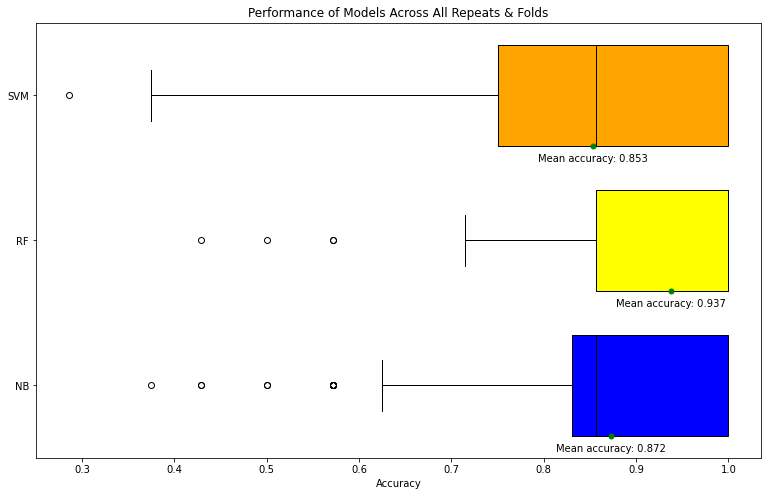

In [13]:
import numpy as np
import matplotlib.pyplot as plt

model = [nb_scores, rf_scores, svm_scores]
model_name = ['NB', 'RF', 'SVM']
colors = ['blue','yellow', 'orange']

fig, ax = plt.subplots(figsize=(13, 8))
boxplot = ax.boxplot(model, labels=model_name, patch_artist=True, vert=False, widths=0.7)

for box, color in zip(boxplot['boxes'], colors):
    box.set(facecolor=color)

mean_scores = [np.mean(scores) for scores in model]
medians = [item.get_ydata()[0] for item in boxplot['medians']]

for i, (mean_score, median) in enumerate(zip(mean_scores, medians)):
    ax.text(mean_score, median - 0.05,
            f'Mean accuracy: {mean_score:.3f}',
            ha='center', va='top')

    
    ax.plot(mean_score, median, marker='o', markersize=5, color='green')
    boxplot['medians'][i].set_color('black')
ax.set_xlabel('Accuracy')
ax.set_title('Performance of Models Across All Repeats & Folds')
plt.show()

### T-test

In [14]:
from sklearn import metrics
from scipy.stats import ttest_rel


t_stat, p_value = ttest_rel(nb_scores, rf_scores)
print("T-Test Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Test Results:
T-Statistic: -12.94569392589144
P-Value: 2.972271613350878e-33


### AUC-ROC

In [15]:
nb_probs = gnb.fit(X, y).predict_proba(X)
nb_auc = metrics.roc_auc_score(y, nb_probs[:, 1])

rf_predictions = rf.fit(X, y).predict_proba(X)
rf_auc = metrics.roc_auc_score(y, rf_predictions[:, 1])

print("GNB AUC-ROC:", nb_auc)
print("Random Forest AUC-ROC:", rf_auc)

GNB AUC-ROC: 0.973604826546003
Random Forest AUC-ROC: 1.0


### Final model interpretation

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

rf.fit(X, y)
pd.DataFrame({'Variable':X.columns,
              'Importance':rf.feature_importances_}).sort_values('Importance', ascending=False)


,Variable,Importance
4,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.301120
7,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.145614
2,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.119141
9,"Values__fft_coefficient__attr_""imag""__coeff_1",0.084350
0,Values__cwt_coefficients__coeff_1__w_2__widths...,0.071376
8,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.066231
3,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.062277
6,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.060329
1,"Values__change_quantiles__f_agg_""mean""__isabs_...",0.044793
5,"Values__change_quantiles__f_agg_""var""__isabs_F...",0.044768


## Contribution

### Pengbo Teng
I focus on model construction, hypothesis testing, conclusions, and identifying limitations. I actively contributed to developing machine learning models, including feature extraction, training, and evaluation. I conducted hypothesis tests to determine the significance of differences in model performance, providing valuable insights into the effectiveness of our approach. Based on the analysis of experimental results, I write meaningful conclusions about the performance of the models in classifying movements. Additionally, I critically assessed the limitations of our product, considering factors like electrode placement and user variability. 

### Elijah Cruz
I mainly focused on creating the spotify interface, where I defined the functions to control music playback and linked the code with my spotify developer account. I contributed to the initial idea generation and brainstorming phase of the project. Furthermore, I constructed a prototype of our product where it ran as a non live version and in the presentation, I contributed to the introduction and motivations sections of our talk as well as our product demo. Additionally, I contributed to writing and editing the introduction and method sections in the final report as well as proofreading the report and checking for grammatical issues.


### Lilith Xie
As for this project, I mainly contributed to data science content and meeting minutes. The code and content for downsampling, feature extraction, data normalisation, feature selection that develops classifiers was written by me. I also rewrote and corrected the code of evaluation. Meanwhile, the slide of presentation and workflow figures were designed by me. I am also responsible for the script of data science’s evaluation analysis in presentation. And the evaluation content in reports was modified by me.  

### Ned Fryar

Ned was responsible for the data collecting for the training of the classifier as well as figuring out the best electrode placement. He also worked on the analysis of the optimum frequency of the product to work on and helped out where possible for the live streaming of the data from the SpikerBox through the classifier. He was the subject in the project presentation and helped in the presentation.His contribution to the report was in the data collection and discussion aspect.

### Rishad Katrak

Rishad aided Elijah in creating the spotify interface and using the spotipy package in python to call the Spotify API. I provided the basic skeleton/outline for the live streaming and classification of data. I wrote the code for converting the wav files provided by Ned into separate files to allow for an easier time in training the model. I evaluated the accuracy of the SVM,RF and NB models and after Lilith managed to extract features, I compared the latency vs accuracy tradeoff with different models, features and event detection methods(SD and median crossing). Additionally, I helped organize the team by assigning tasks to individuals keeping their strengths and weaknesses in mind

### Jin Jie Deng
Troy was committed to establishing preliminary models in the early stage, providing some ideas for the product to run. I also participated in the process of modifying, optimising, and evaluating the model in the later stage, and was responsible for writing some meeting minutes. In this report production, I was responsible for completing the data processing section and explaining the reasons for choosing four classifiers. I also summarised the most suitable classifier for us in the results and discussed the potential problems that data students encounter in group assignments.In the model evaluation section, I assisted the team members in completing the plot and  in the evaluation. Finally, I helped the team member revise and improve the details of the conclusion.

## Package version